Rozłożenie zasobów

PULP

W tym zadaniu należało zmaksymalizować zysk ze sprzedaży partii okien. Zasoby określono na obrazku poniżej.

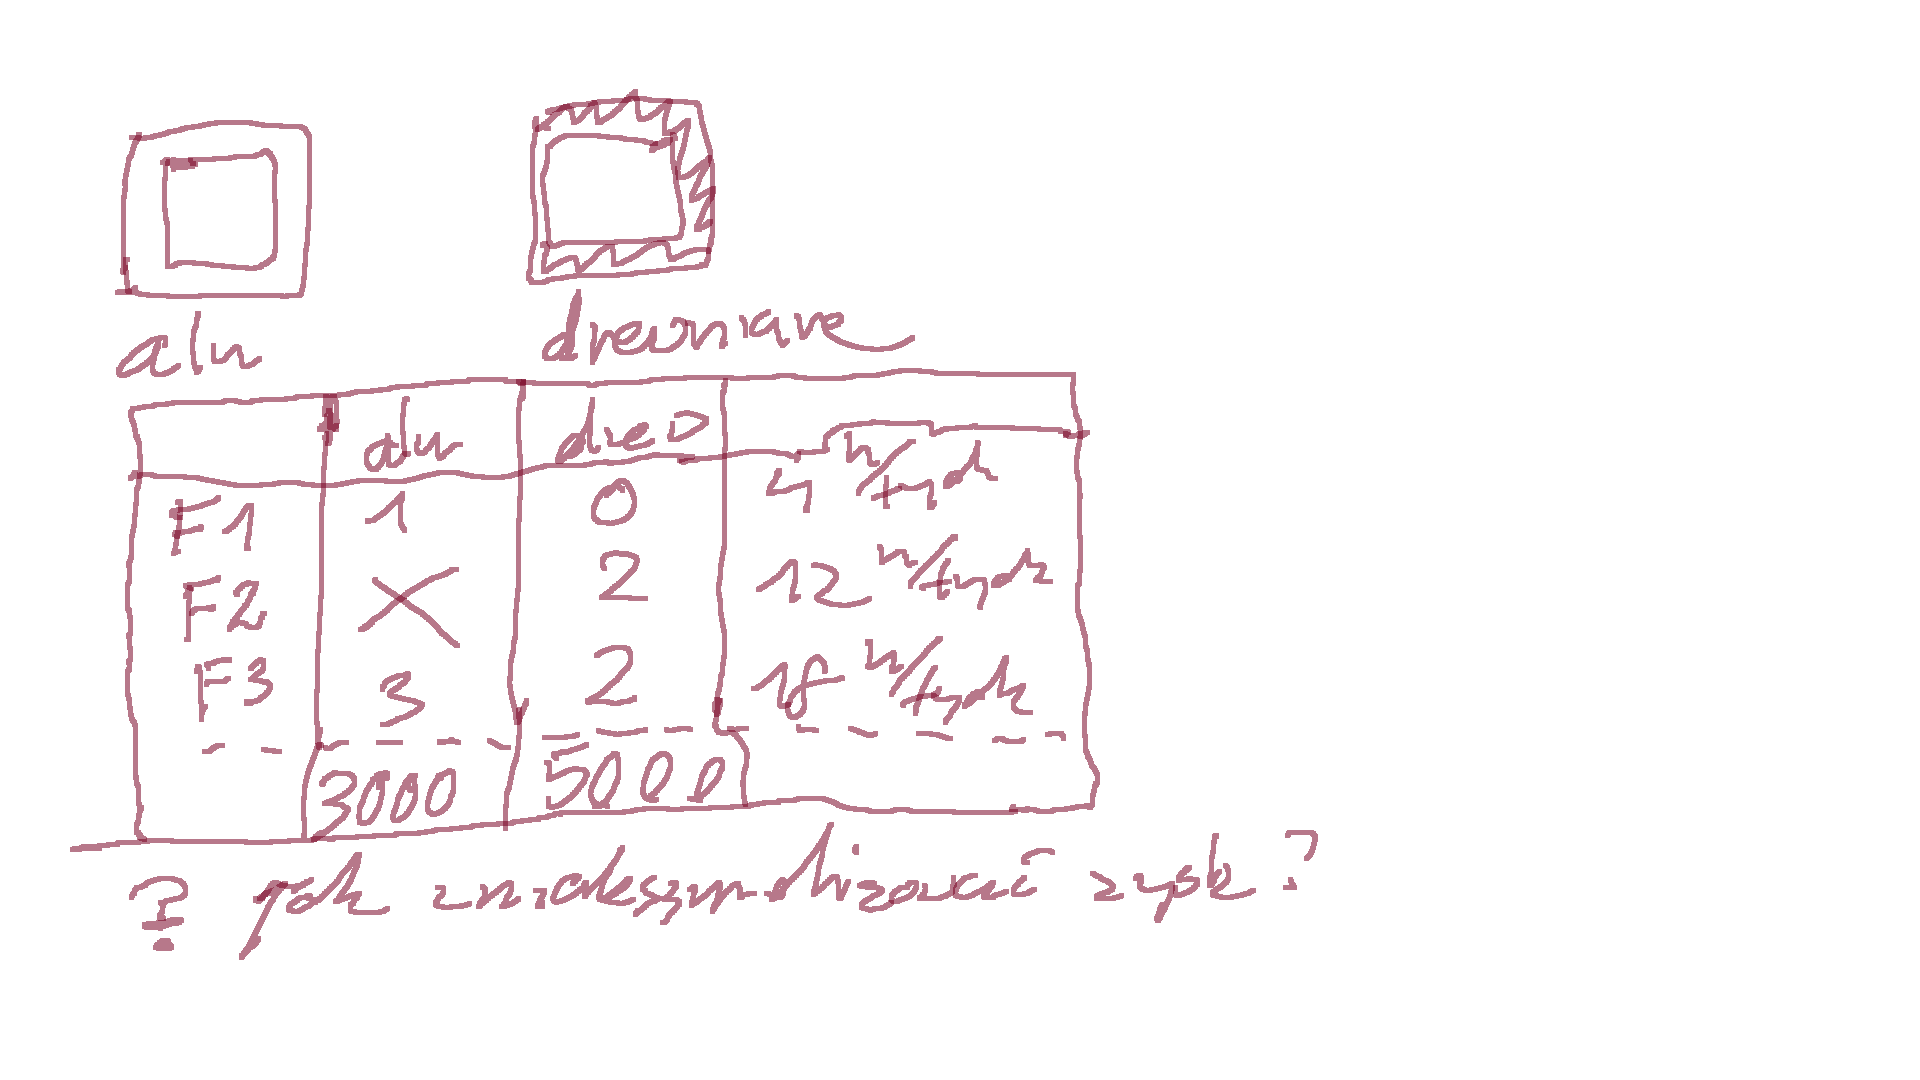


Każda z trzech fabryk ma określoną zdolność produkcyjną danego typu okien oraz dostępny czas produkcyjny.

**Kroki analizowania problemu**

1. Identyfikacja zmiennych decyzyjnych

2. Określenie funkcji celu

3. Określenie ograniczeń

4. Rozwiązanie problemu

*Zmienne decyzyjne*

-Ilość partii okien aluminiowych x1, Ilość partii okien drewnianych x2

*Funkcja celu*

-Maksymalizacja zysku

3.0 • (x1) + 5.0 • (x2)

*Ograniczenia*

-wydajność i dostępność fabryk f1, f2, f3
3.0 • x1 + 2.0 • x2 <= 18

1.0 • x1 <= 4.0

2.0 • x2 <= 12.0

-brak wartośći ujemnych
x1>=0 x2>=0


W celu wykonania programu zainstalowano potrzebne bibloteki.

In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

     |████████████████████████████████| 40.6MB 105kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5
  coinor-libosi1v5 libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev default-libmysqlclient-dev
The following NEW packages will be installed:
  coinor-cbc coinor-clp coinor-libcbc3 coinor-libcgl1 coinor-libclp1
  coinor-libcoinutils3v5 coinor-libosi1v5 glpk-utils libamd2 libcolamd2
  libglpk40 libsuitesparseconfig5
0 upgraded, 12 newly installed, 0 to remove and 15 not upgraded.
Need to get 3,439 kB of archives.
After this operation, 9,832 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsuitesparseconfig5 amd64 1:5.1.2-2 [9,044 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libamd2 amd64 1:5.1.2-2 [19.5 kB]
Get:3 

In [ ]:
import pulp


from pulp import *
#print(pulp.__version__)
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, FloatSlider, IntSlider
import ipywidgets as widgets
import pandas as pd

style = {'description_width': '200px'}
layout= Layout(width='50%', height='auto',grid_gap="50px")


zysk_alu_slider = FloatSlider(min=500,max=10000,value=3000,description="Zysk aluminiowe",style=style,layout=layout,step=100)
zysk_drewniane_slider = FloatSlider(min=500,max=10000,value=5000,description="Zysk drewniane okna",style=style,layout=layout,step=100)
godz_alu_F1_slider = FloatSlider(min=0,max=10,value=1,description="Godziny aluminiowe F1",style=style,layout=layout,step=0.5)
godz_alu_F2_slider = FloatSlider(min=0,max=10,value=0,description="Godziny aluminiowe F2",style=style,layout=layout,step=0.5)
godz_alu_F3_slider = FloatSlider(min=0,max=10,value=3,description="Godziny aluminiowe F3",style=style,layout=layout,step=0.5)
godz_drewniane_F1_slider = FloatSlider(min=0,max=10,value=0,description="Godziny drewniane F1",style=style,layout=layout,step=0.5)
godz_drewniane_F2_slider = FloatSlider(min=0,max=10,value=2,description="Godziny drewniane F2",style=style,layout=layout,step=0.5)
godz_drewniane_F3_slider = FloatSlider(min=0,max=10,value=2,description="Godziny drewniane F3",style=style,layout=layout,step=0.5)
maks_godz_F1_slider = FloatSlider(min=0,max=50,value=4,description="Max godzina F1",style=style,layout=layout,step=0.5)
maks_godz_F2_slider = FloatSlider(min=0,max=50,value=12,description="Max godzina F2",style=style,layout=layout,step=0.5)
maks_godz_F3_slider = FloatSlider(min=0,max=50,value=18,description="Max godzina F3",style=style,layout=layout,step=0.5)

def okna(
    zysk_alu = 3000,
    zysk_drewniane = 5000,
    godz_alu_F1 = 1,
    godz_alu_F2 = 0,
    godz_alu_F3 = 3,
    godz_drewniane_F1 = 0,
    godz_drewniane_F2 = 2,
    godz_drewniane_F3 = 2,
    maks_godz_F1 = 4,
    maks_godz_F2 = 12,
    maks_godz_F3 = 18
    ):
  
    
    prob = LpProblem("Maksymalizacja_zysku_z_okien",LpMaximize)

    x1=LpVariable("partie_alu",0,None,LpInteger)
    x2=LpVariable("partie_drewniane",0,None,LpInteger)

    prob += zysk_alu*x1 + zysk_drewniane*x2   

    prob += godz_alu_F1*x1 + godz_drewniane_F1*x2 <= maks_godz_F1, "Max h/tyg w F1"
    prob += godz_alu_F2*x1 + godz_drewniane_F2*x2 <= maks_godz_F2, "Max h/tyg w F2"
    prob += godz_alu_F3*x1 + godz_drewniane_F3*x2 <= maks_godz_F3, "Max h/tyg w F3"

    if godz_alu_F1 == 0 and godz_alu_F2 == 0 and godz_alu_F3 == 0: prob += x1 == 0
    if godz_drewniane_F1 == 0 and godz_drewniane_F2 == 0 and godz_drewniane_F3 == 0: prob += x2 == 0

    prob.writeLP("okna.lp")
    prob.solve()

    varsdict = {}

    for v in prob.variables():
        varsdict[v.name] = str(v.varValue)

    

    print()
    print("Status:", LpStatus[prob.status])
    print("Końcowy zysk {}$, okna: {}".format(value(prob.objective),varsdict))
    print()
    shadows = [{'name':name, 'shadow price': c.pi, "slack": c.slack} for name, c in prob.constraints.items()]
    print("*"*15+"Shadow Prices"+"*"*15)
    print(pd.DataFrame(shadows))
    print("*"*30)


interact(
    okna,zysk_alu = zysk_alu_slider,
    zysk_drewniane = zysk_drewniane_slider,
    godz_alu_F1 = godz_alu_F1_slider,
    godz_alu_F2 = godz_alu_F2_slider,
    godz_alu_F3 = godz_alu_F3_slider,
    godz_drewniane_F1 = godz_drewniane_F1_slider,
    godz_drewniane_F2 = godz_drewniane_F2_slider,
    godz_drewniane_F3 = godz_drewniane_F3_slider,
    maks_godz_F1 = maks_godz_F1_slider,
    maks_godz_F2 = maks_godz_F2_slider,
    maks_godz_F3 = maks_godz_F3_slider
)

interactive(children=(FloatSlider(value=3000.0, description='Zysk aluminiowe', layout=Layout(grid_gap='50px', …

<function __main__.okna>